In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = sns.load_dataset('titanic')
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [3]:
data.drop(columns = ['embarked', 'class', 'deck', 'embark_town', 'alive', 'sibsp', 'pclass', 'parch', 'who'], inplace = True)
data

,survived,sex,age,fare,adult_male,alone
0,0,male,22.0,7.2500,True,False
1,1,female,38.0,71.2833,False,False
2,1,female,26.0,7.9250,False,True
3,1,female,35.0,53.1000,False,False
4,0,male,35.0,8.0500,True,True
...,...,...,...,...,...,...
886,0,male,27.0,13.0000,True,True
887,1,female,19.0,30.0000,False,True
888,0,female,NaN,23.4500,False,False
889,1,male,26.0,30.0000,True,True


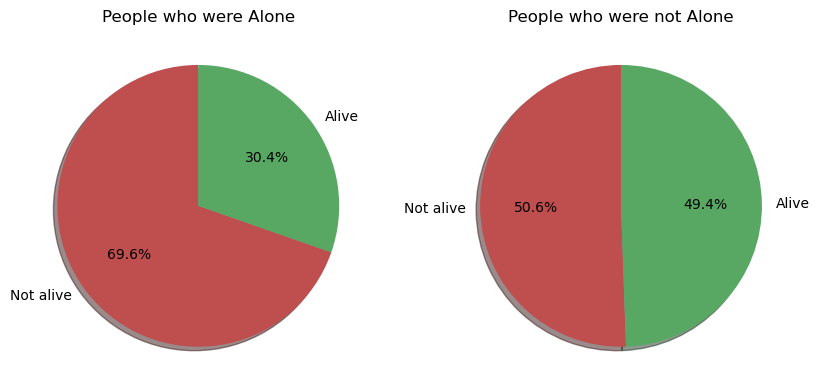

In [4]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].set_title('People who were Alone')
axs[0].pie(data[data['alone'] == True]['survived'].value_counts(), labels = ['Not alive' ,'Alive'], autopct = '%1.1f%%', startangle = 90, shadow = True, colors = ['#bf4e4e', '#58a864'])
axs[1].set_title('People who were not Alone')
axs[1].pie(data[data['alone'] == False]['survived'].value_counts(), labels = ['Not alive' ,'Alive'], autopct = '%1.1f%%', startangle = 90, shadow = True, colors = ['#bf4e4e', '#58a864'])
plt.show()

In [5]:
data['sex'] = data['sex'].apply(lambda x: 1 if x == 'male' else 0)
data.head()

,survived,sex,age,fare,adult_male,alone
0,0,1,22.0,7.2500,True,False
1,1,0,38.0,71.2833,False,False
2,1,0,26.0,7.9250,False,True
3,1,0,35.0,53.1000,False,False
4,0,1,35.0,8.0500,True,True


In [6]:
data.rename(columns = {'sex' : 'male'}, inplace = True)

In [7]:
data.head()

,survived,male,age,fare,adult_male,alone
0,0,1,22.0,7.2500,True,False
1,1,0,38.0,71.2833,False,False
2,1,0,26.0,7.9250,False,True
3,1,0,35.0,53.1000,False,False
4,0,1,35.0,8.0500,True,True


In [8]:
data.isna().any()

survived      False
male          False
age            True
fare          False
adult_male    False
alone         False
dtype: bool

In [9]:
data['age'] = data['age'].fillna(np.mean(data['age']))
data.isna().any()

survived      False
male          False
age           False
fare          False
adult_male    False
alone         False
dtype: bool

In [10]:
X = data.iloc[:, 1:]
y = data.iloc[: , 1]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
model = RandomForestClassifier()
params = {'n_estimators':[10, 20, 30, 50, 100, 120, 150]}
model_clf = GridSearchCV(model, param_grid = params, scoring = 'accuracy', cv = 10)
model_clf.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [10, 20, 30, 50, 100, 120, 150]},
             scoring='accuracy')

In [12]:
model_clf.best_score_

1.0

In [13]:
model_clf.best_params_

{'n_estimators': 10}

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
y_pred = model_clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        69
           1       1.00      1.00      1.00       110

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



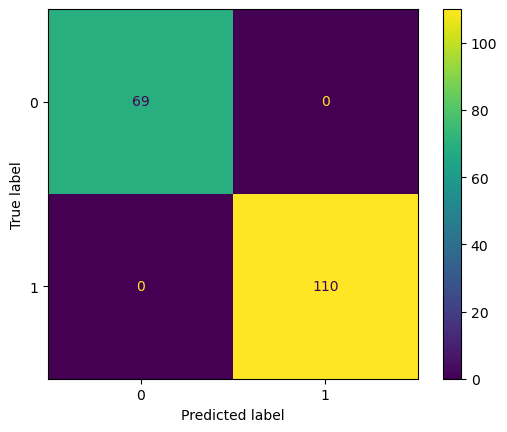

In [15]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

In [16]:
importances = model_clf.best_estimator_.feature_importances_
importances

array([4.57966644e-01, 3.13095683e-02, 3.02534782e-02, 4.80090846e-01,
       3.79463673e-04])

<BarContainer object of 5 artists>

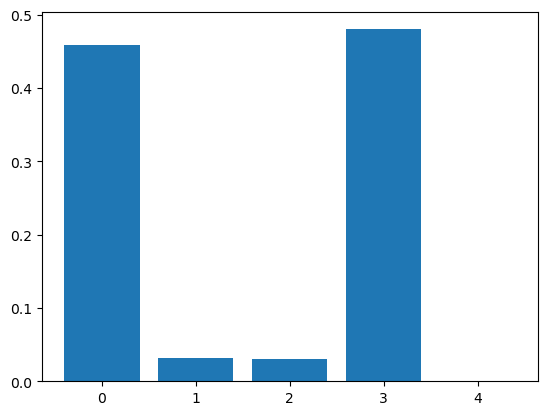

In [17]:
plt.bar([x for x in range(len(importances))], importances)

In [18]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
params = {'n_estimators':[10, 20, 30, 50, 100, 120, 150]}
model_clf = GridSearchCV(model, param_grid = params, scoring = 'accuracy', cv = 10)
model_clf.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=AdaBoostClassifier(),
             param_grid={'n_estimators': [10, 20, 30, 50, 100, 120, 150]},
             scoring='accuracy')

In [19]:
model_clf.best_params_

{'n_estimators': 10}

In [20]:
model_clf.best_score_

1.0

In [21]:
y_pred = model_clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        69
           1       1.00      1.00      1.00       110

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



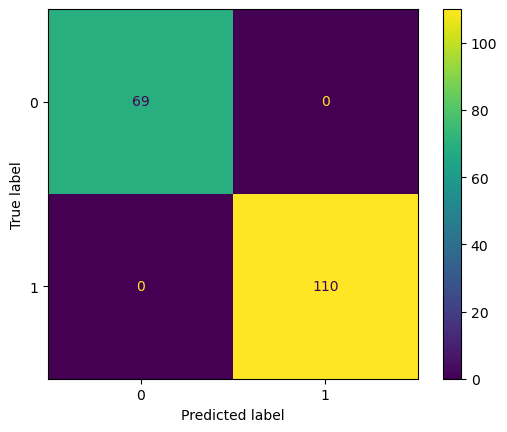

In [22]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

In [23]:
importances = model_clf.best_estimator_.feature_importances_
importances

array([1., 0., 0., 0., 0.])

<BarContainer object of 5 artists>

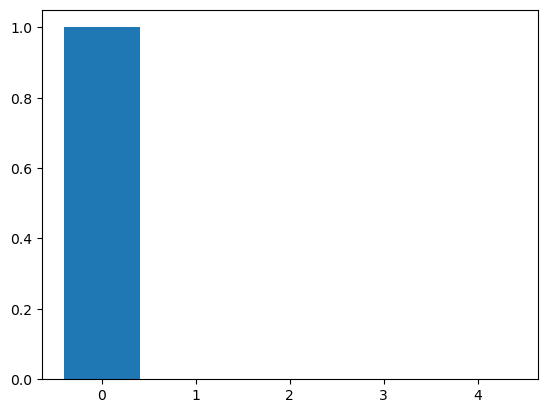

In [24]:
plt.bar([x for x in range(len(importances))], importances)